# Imports

In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from io import BytesIO
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
from matplotlib.font_manager import FontProperties
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
from matplotlib.patheffects import withStroke, Normal
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, Sbopen
from mplsoccer.utils import FontManager
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch, FontManager, Sbopen, add_image
from mplsoccer.pitch import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from sklearn.cluster import KMeans
import warnings
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os
import time
from unidecode import unidecode

# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
# bg_color= '#000000'
# line_color= '#ffffff'
col1 = '#ff4b44'
col2 = '#00a0de'

In [4]:
df = pd.read_csv("D:\FData\Euro2024\Till_SF.csv")

# Functions

In [9]:
pname = 'Lamine Yamal'
hcol = col1

In [40]:
def individual_passMap(ax, pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 105.5)
    ax.set_ylim(-0.5, 68.5)

    dfpass = df[(df['type']=='Pass') & (df['name']==pname)]
    acc_pass = dfpass[dfpass['outcomeType']=='Successful']
    iac_pass = dfpass[dfpass['outcomeType']=='Unsuccessful']
    
    if len(dfpass) != 0:
        accurate_pass_perc = round((len(acc_pass)/len(dfpass))*100, 2)
    else:
        accurate_pass_perc = 0
    
    pro_pass = acc_pass[(acc_pass['prog_pass']>=9.11) & (acc_pass['x']>=35) &
                        (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball_acc = Thr_ball[Thr_ball['outcomeType']=='Successful']
    Crs_pass = dfpass[(dfpass['qualifiers'].str.contains('Cross')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Crs_pass_acc = Crs_pass[Crs_pass['outcomeType']=='Successful']
    key_pass = dfpass[dfpass['qualifiers'].str.contains('KeyPass')]
    big_chnc = dfpass[dfpass['qualifiers'].str.contains('BigChanceCreated')]
    df_no_carry = df[df['type']!='Carry'].reset_index(drop=True)
    pre_asst = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcomeType']=='Successful') &  (df_no_carry['name']==pname)]
    shot_buildup = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('KeyPass')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcomeType']=='Successful') &  (df_no_carry['name']==pname)]
    g_assist = dfpass[dfpass['qualifiers'].str.contains('IntentionalGoalAssist')]
    fnl_thd = acc_pass[(acc_pass['endX']>=70) & (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pen_box = acc_pass[(acc_pass['endX']>=88.5) & (acc_pass['endY']>=13.6) & (acc_pass['endY']<=54.4) & 
                       (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    frwd_pass = dfpass[(dfpass['pass_or_carry_angle']>= -85) & (dfpass['pass_or_carry_angle']<= 85) & 
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    back_pass = dfpass[((dfpass['pass_or_carry_angle']>= 95) & (dfpass['pass_or_carry_angle']<= 180) | 
                        (dfpass['pass_or_carry_angle']>= -180) & (dfpass['pass_or_carry_angle']<= -95)) &
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    side_pass = dfpass[((dfpass['pass_or_carry_angle']>= 85) & (dfpass['pass_or_carry_angle']<= 95) | 
                        (dfpass['pass_or_carry_angle']>= -95) & (dfpass['pass_or_carry_angle']<= -85)) & 
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    frwd_pass_acc = frwd_pass[frwd_pass['outcomeType']=='Successful']
    back_pass_acc = back_pass[back_pass['outcomeType']=='Successful']
    side_pass_acc = side_pass[side_pass['outcomeType']=='Successful']
    corners = dfpass[dfpass['qualifiers'].str.contains('CornerTaken')]
    corners_acc = corners[corners['outcomeType']=='Successful']
    freekik = dfpass[dfpass['qualifiers'].str.contains('Freekick')]
    freekik_acc = freekik[freekik['outcomeType']=='Successful']
    thins = dfpass[dfpass['qualifiers'].str.contains('ThrowIn')]
    thins_acc = thins[thins['outcomeType']=='Successful']
    lngball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    lngball_acc = lngball[lngball['outcomeType']=='Successful']

    if len(frwd_pass) != 0:
        Forward_Pass_Accuracy = round((len(frwd_pass_acc)/len(frwd_pass))*100, 2)
    else:
        Forward_Pass_Accuracy = 0
    
    df_xT_inc = dfpass[dfpass['xT']>0]
    df_xT_dec = dfpass[dfpass['xT']<0]

    pitch.lines(iac_pass.x, iac_pass.y, iac_pass.endX, iac_pass.endY, color=line_color, lw=4, alpha=0.15, comet=True, zorder=2, ax=ax)
    pitch.lines(acc_pass.x, acc_pass.y, acc_pass.endX, acc_pass.endY, color=line_color, lw=2, alpha=0.15, comet=True, zorder=2, ax=ax)
    pitch.lines(pro_pass.x, pro_pass.y, pro_pass.endX, pro_pass.endY, color=hcol      , lw=3, alpha=1,    comet=True, zorder=3, ax=ax)
    pitch.lines(key_pass.x, key_pass.y, key_pass.endX, key_pass.endY, color=violet,     lw=4, alpha=1,    comet=True, zorder=4, ax=ax)
    pitch.lines(g_assist.x, g_assist.y, g_assist.endX, g_assist.endY, color='green',      lw=4, alpha=1,    comet=True, zorder=5, ax=ax)

    ax.scatter(acc_pass.endX, acc_pass.endY, s=30, color=bg_color,    edgecolor='gray', alpha=1, zorder=2)
    ax.scatter(pro_pass.endX, pro_pass.endY, s=40, color=bg_color,  edgecolor= hcol,  alpha=1, zorder=3)
    ax.scatter(key_pass.endX, key_pass.endY, s=50, color=bg_color,  edgecolor=violet, alpha=1, zorder=4)
    ax.scatter(g_assist.endX, g_assist.endY, s=50, color=bg_color,  edgecolor= 'green', alpha=1, zorder=5)


    ax.set_title(f"PassMap", color='k', fontsize=25, fontweight='bold', y=1.03)
    ax_text(0, -3, f'''Accurate Pass: {len(acc_pass)}/{len(dfpass)} ({accurate_pass_perc}%) | <Progressive Pass: {len(pro_pass)}> | <Chances Created: {len(key_pass)}>
Big Chances Created: {len(big_chnc)} | <Assists: {len(g_assist)}> | Pre-Assist: {len(pre_asst)} | Build-up to Shot: {len(shot_buildup)}
Final third Passes: {len(fnl_thd)} | Passes into Penalty box: {len(pen_box)} | Crosses (Acc.): {len(Crs_pass)} ({len(Crs_pass_acc)})
Longballs (Acc.): {len(lngball)} ({len(lngball_acc)}) | xT from Pass: {df_xT_inc['xT'].sum().round(2)}
''', highlight_textprops=[{'color':hcol}, {'color':violet}, {'color':'green'}], fontsize=15, ha='left', va='top', ax=ax)
    # Open-Play Forward Pass (Acc.): {len(frwd_pass)} ({len(frwd_pass_acc)})
    # Open-Play Side Pass (Acc.): {len(side_pass)} ({len(side_pass_acc)})
    # Open-Play Back Pass (Acc.): {len(back_pass)} ({len(back_pass_acc)})
    # xT decreased as passer: {df_xT_dec['xT'].sum().round(2)}
    
    return


# fig,ax=plt.subplots(figsize=(10,10))
# individual_passMap(ax, pname)

In [39]:
def individual_carry(ax,pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5,105.5)
    ax.set_ylim(-0.5,68.5)

    df_carry = df[(df['type']=='Carry') & (df['name']==pname)]
    led_shot1 = df[(df['type']=='Carry') & (df['name']==pname) & (df['qualifiers'].shift(-1).str.contains('KeyPass'))]
    led_shot2 = df[(df['type']=='Carry') & (df['name']==pname) & (df['type'].shift(-1).str.contains('Shot'))]
    led_shot = pd.concat([led_shot1, led_shot2])
    led_goal1 = df[(df['type']=='Carry') & (df['name']==pname) & (df['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist'))]
    led_goal2 = df[(df['type']=='Carry') & (df['name']==pname) & (df['type'].shift(-1)=='Goal')]
    led_goal = pd.concat([led_goal1, led_goal2])
    pro_carry = df_carry[(df_carry['prog_carry']>=9.11) & (df_carry['x']>=35)]
    fth_carry = df_carry[(df_carry['x']<70) & (df_carry['endX']>=70)]
    box_entry = df_carry[(df_carry['endX']>=88.5) & (df_carry['endY']>=13.6) & (df_carry['endY']<=54.4) &
                 ~((df_carry['x']>=88.5) & (df_carry['y']>=13.6) & (df_carry['y']<=54.6))]
    disp = df[(df['type']=='Carry') & (df['name']==pname) & (df['type'].shift(-1)=='Dispossessed')]
    df_to = df[(df['type']=='TakeOn') & (df['name']==pname)]
    t_ons = df_to[df_to['outcomeType']=='Successful']
    t_onu = df_to[df_to['outcomeType']=='Unsuccessful']
    df_xT_inc = df_carry[df_carry['xT']>0]
    df_xT_dec = df_carry[df_carry['xT']<0]
    df_carry = df_carry.copy()
    df_carry.loc[:, 'Length'] = np.sqrt((df_carry['x'] - df_carry['endX'])**2 + (df_carry['y'] - df_carry['endY'])**2)
    median_length = round(df_carry['Length'].median(),2)
    total_length = round(df_carry['Length'].sum(),2)
    if len(df_to)!=0:
        success_rate = round((len(t_ons)/len(df_to))*100, 2)
    else:
        success_rate = 0

    for index, row in df_carry.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['endX'], row['endY']), color=line_color, alpha=0.25, arrowstyle='->', linestyle='--', 
                                   linewidth=2, mutation_scale=15, zorder=2)
        ax.add_patch(arrow)
    for index, row in pro_carry.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['endX'], row['endY']), color=hcol, alpha=1, arrowstyle='->', linestyle='--', linewidth=3, 
                                   mutation_scale=20, zorder=3)
        ax.add_patch(arrow)
    for index, row in led_shot.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['endX'], row['endY']), color=violet, alpha=1, arrowstyle='->', linestyle='--', linewidth=4, 
                                   mutation_scale=20, zorder=4)
        ax.add_patch(arrow)
    for index, row in led_goal.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['endX'], row['endY']), color='green', alpha=1, arrowstyle='->', linestyle='--', linewidth=4, 
                                   mutation_scale=20, zorder=4)
        ax.add_patch(arrow)

    ax.scatter(t_ons.x, t_ons.y, s=250, color='orange', edgecolor=line_color, lw=2, zorder=5)
    ax.scatter(t_onu.x, t_onu.y, s=250, color='None', edgecolor='orange', hatch='/////', lw=2.5, zorder=5)

    ax.set_title(f"Carries & TakeOns", color='k', fontsize=25, fontweight='bold', y=1.03)
    ax_text(0, -3, f'''Total Carries: {len(df_carry)} | <Progressive Carries: {len(pro_carry)}> | <Carries Led to Shot: {len(led_shot)}>
<Carries Led to Goal: {len(led_goal)}> | Carrier Dispossessed: {len(disp)} | Carries into Final third: {len(fth_carry)}
Carries into pen.box: {len(box_entry)} | Avg. Carry Length: {median_length} m | Total Carry: {total_length} m
xT from Carries: {df_xT_inc['xT'].sum().round(2)} | <Successful TakeOns: {len(t_ons)}/{len(df_to)} ({success_rate}%)>
''', highlight_textprops=[{'color':hcol}, {'color':violet}, {'color':'green'}, {'color':'darkorange'}], fontsize=15, ha='left', 
            va='top', ax=ax)
    # xT decreased as carrier: {df_xT_dec['xT'].sum().round(2)}
    return

# fig,ax=plt.subplots(figsize=(10,10))
# individual_carry(ax, pname)

In [38]:
def Individual_ShotMap(ax,pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5,105.5)
    ax.set_ylim(-0.5, 68.5)

    goal = df[(df['name']==pname) & (df['type']=='Goal') & (~df['qualifiers'].str.contains('BigChance'))]
    miss = df[(df['name']==pname) & (df['type']=='MissedShots') & (~df['qualifiers'].str.contains('BigChance'))]
    save = df[(df['name']==pname) & (df['type']=='SavedShot') & (~df['qualifiers'].str.contains('BigChance')) & (~df['qualifiers'].str.contains(': 82'))]
    blok = df[(df['name']==pname) & (df['type']=='SavedShot') & (~df['qualifiers'].str.contains('BigChance')) & (df['qualifiers'].str.contains(': 82'))]
    post = df[(df['name']==pname) & (df['type']=='ShotOnPost') & (~df['qualifiers'].str.contains('BigChance'))]

    # op_sh = shots_df[(shots_df['playerName']==pname) & (shots_df['situation']=='RegularPlay')]
    op_sh = df[(df['name']==pname) & (df['qualifiers'].str.contains('RegularPlay'))]

    # goal = shots_df[(shots_df['playerName']==pname) & (shots_df['eventType']=='Goal')]
    # miss = shots_df[(shots_df['playerName']==pname) & (shots_df['eventType']=='Miss')]
    # save = shots_df[(shots_df['playerName']==pname) & (shots_df['eventType']=='AttemptSaved') & (shots_df['isBlocked']==0)]
    # blok = shots_df[(shots_df['playerName']==pname) & (shots_df['eventType']=='AttemptSaved') & (shots_df['isBlocked']==1)]
    # post = shots_df[(shots_df['playerName']==pname) & (shots_df['eventType']=='Post')]

    goal_bc = df[(df['name']==pname) & (df['type']=='Goal') & (df['qualifiers'].str.contains('BigChance'))]
    miss_bc = df[(df['name']==pname) & (df['type']=='MissedShots') & (df['qualifiers'].str.contains('BigChance'))]
    save_bc = df[(df['name']==pname) & (df['type']=='SavedShot') & (df['qualifiers'].str.contains('BigChance')) & (~df['qualifiers'].str.contains(': 82'))]
    blok_bc = df[(df['name']==pname) & (df['type']=='SavedShot') & (df['qualifiers'].str.contains('BigChance')) & (df['qualifiers'].str.contains(': 82'))]
    post_bc = df[(df['name']==pname) & (df['type']=='ShotOnPost') & (df['qualifiers'].str.contains('BigChance'))]

    shots = df[(df['name']==pname) & ((df['type']=='Goal') | (df['type']=='MissedShots') | (df['type']=='SavedShot') | (df['type']=='ShotOnPost'))]
    out_box = shots[shots['qualifiers'].str.contains('OutOfBox')]
    shots = shots.copy()
    shots.loc[:, 'Length'] = np.sqrt((shots['x'] - 105)**2 + (shots['y'] - 34)**2)
    avg_dist = round(shots['Length'].mean(), 2)
    # xG = shots_df[(shots_df['playerName']==pname)]['expectedGoals'].sum().round(2)
    # xGOT = shots_df[(shots_df['playerName']==pname)]['expectedGoalsOnTarget'].sum().round(2)
    xG = 1.9
    xGOT = 1.75

    # pitch.scatter(goal.x,goal.y, s=goal['expectedGoals']*1000+100, marker='football', c='None', edgecolors='green', zorder=5, ax=ax)
    # pitch.scatter(post.x,post.y, s=post['expectedGoals']*1000+100, marker='o', c='None', edgecolors=hcol, hatch='+++', zorder=4, ax=ax)
    # pitch.scatter(blok.x,blok.y, s=blok['expectedGoals']*1000+100, marker='o', c='None', edgecolors=hcol, hatch='/////', zorder=4, ax=ax)
    # pitch.scatter(save.x,save.y, s=save['expectedGoals']*1000+100, marker='o', c=hcol, edgecolors=line_color, zorder=3, ax=ax)
    # pitch.scatter(miss.x,miss.y, s=miss['expectedGoals']*1000+100, marker='o', c='None', edgecolors=hcol, zorder=2, ax=ax)

    pitch.scatter(goal.x,goal.y, s=200, marker='football', c='None', edgecolors='green', zorder=5, ax=ax)
    pitch.scatter(post.x,post.y, s=150, marker='o', c='None', edgecolors=hcol, hatch='+++', zorder=4, ax=ax)
    pitch.scatter(blok.x,blok.y, s=150, marker='o', c='None', edgecolors=hcol, hatch='/////', zorder=4, ax=ax)
    pitch.scatter(save.x,save.y, s=130, marker='o', c=hcol, edgecolors=line_color, zorder=3, alpha=0.75, ax=ax)
    pitch.scatter(miss.x,miss.y, s=130, marker='o', c='None', edgecolors=hcol, zorder=2, ax=ax)

    pitch.scatter(goal_bc.x,goal_bc.y, s=300, marker='football', c='None', edgecolors='green', zorder=5, ax=ax)
    pitch.scatter(post_bc.x,post_bc.y, s=240, marker='o', c='None', edgecolors=hcol, hatch='/////', zorder=4, ax=ax)
    pitch.scatter(save_bc.x,save_bc.y, s=240, marker='o', c=hcol, edgecolors=line_color, zorder=3, alpha=0.75, ax=ax)
    pitch.scatter(miss_bc.x,miss_bc.y, s=210, marker='o', c='None', edgecolors=hcol, zorder=2, ax=ax)

    yhalf = [-0.5, -0.5, 68.5, 68.5]
    xhalf = [-0.5, 52.5, 52.5, -0.5]
    ax.fill(xhalf, yhalf, bg_color, alpha=1)

    pitch.scatter(2,56-(0*4), s=200, marker='football', c='None', edgecolors='green', zorder=5, ax=ax)
    pitch.scatter(2,56-(1*4), s=150, marker='o', c='None', edgecolors=hcol, hatch='+++', zorder=4, ax=ax)
    pitch.scatter(2,56-(2*4), s=150, marker='o', c=hcol, edgecolors=line_color, zorder=3, ax=ax)
    pitch.scatter(2,56-(3*4), s=130, marker='o', c='None', edgecolors=hcol, zorder=2, ax=ax)
    pitch.scatter(2,56-(4*4), s=130, marker='o', c='None', edgecolors=hcol, hatch='/////', zorder=2, ax=ax)

    ax.text(0, 71, f"Shooting Stats", color=line_color, fontsize=25, fontweight='bold')
    ax.text(7,64-(0*4), f'Total Shots: {len(shots)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(1*4), f'Open-play Shots: {len(op_sh)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(2*4), f'Goals: {len(goal)+len(goal_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(3*4), f'Shot on Post: {len(post)+len(post_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(4*4), f'Shots on Target: {len(save)+len(save_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(5*4), f'Shots off Target: {len(miss)+len(miss_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(6*4), f'Shots Blocked: {len(blok)+len(blok_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(7*4), f'Big Chances: {len(goal_bc)+len(miss_bc)+len(save_bc)+len(post_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(8*4), f'Big Chances Missed: {len(miss_bc)+len(save_bc)+len(post_bc)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(9*4), f'Shots outside box: {len(out_box)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(10*4), f'Shots inside box: {len(shots) - len(out_box)}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(11*4), f'Avg. Shot Distance: {avg_dist} m', fontsize=15, ha='left', va='center')
    ax.text(7,64-(12*4), f'xG: {xG}', fontsize=15, ha='left', va='center')
    ax.text(7,64-(13*4), f'xGOT: {xGOT}', fontsize=15, ha='left', va='center')

    ax.text(80, 71, f"Shot Map", color=line_color, fontsize=25, fontweight='bold', ha='center')
    return

# fig,ax=plt.subplots(figsize=(10,10))
# Individual_ShotMap(ax, pname)

In [22]:
def individual_passes_recieved(ax, pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 105.5)
    ax.set_ylim(-0.5, 68.5)

    dfp = df[df['type']!= 'Carry'].reset_index(drop=True)
    dfp = dfp[(dfp['type']=='Pass') & (dfp['outcomeType']=='Successful') & (dfp['name'].shift(-1)==pname)]
    dfkp = dfp[dfp['qualifiers'].str.contains('KeyPass')]
    dfas = dfp[dfp['qualifiers'].str.contains('IntentionalGoalAssist')]
    dfnt = dfp[dfp['endX']>=70]
    dfpen = dfp[(dfp['endX']>=87.5) & (dfp['endY']>=13.6) & (dfp['endY']<=54.6)]
    dfpro = dfp[(dfp['x']>=35) & (dfp['prog_pass']>=9.11) & (~dfp['qualifiers'].str.contains('CornerTaken|Frerkick'))]
    dfcros = dfp[(dfp['qualifiers'].str.contains('Cross')) & (~dfp['qualifiers'].str.contains('CornerTaken|Frerkick'))]
    dfxT = dfp[dfp['xT']>=0]
    dflb = dfp[(dfp['qualifiers'].str.contains('Longball'))]
    cutback = dfp[((dfp['x'] >= 88.54) & (dfp['x'] <= 105) & 
                       ((dfp['y'] >= 40.8) & (dfp['y'] <= 54.4) | (dfp['y'] >= 13.6) & (dfp['y'] <= 27.2)) & 
                       (dfp['endY'] >= 27.2) & (dfp['endY'] <= 40.8) & (dfp['endX'] >= 81.67))]
    next_act = df[(df['name']==pname) & (df['type'].shift(1)=='Pass') & (df['outcomeType'].shift(1)=='Successful')]
    ball_retain = next_act[(next_act['outcomeType']=='Successful') & ((next_act['type']!='Foul') | (next_act['type']!='Dispossessed'))]
    if len(next_act) != 0:
        ball_retention = round((len(ball_retain)/len(next_act))*100, 2)
    else:
        ball_retention = 0

    if len(dfp) != 0:
        name_counts = dfp['shortName'].value_counts()
        name_counts_df = name_counts.reset_index()
        name_counts_df.columns = ['name', 'count']
        name_counts_df = name_counts_df.sort_values(by='count', ascending=False)  
        name_counts_df = name_counts_df.reset_index()
        r_name = name_counts_df['name'][0]
        r_count = name_counts_df['count'][0]
    else:
        r_name = 'None'
        r_count = 0        

    pitch.lines(dfp.x, dfp.y, dfp.endX, dfp.endY, lw=3, transparent=True, comet=True,color=hcol, ax=ax, alpha=0.5)
    pitch.lines(dfkp.x, dfkp.y, dfkp.endX, dfkp.endY, lw=4, transparent=True, comet=True,color=violet, ax=ax, alpha=0.75)
    pitch.lines(dfas.x, dfas.y, dfas.endX, dfas.endY, lw=4, transparent=True, comet=True,color='green', ax=ax, alpha=0.75)
    pitch.scatter(dfp.endX, dfp.endY, s=30, edgecolor=hcol, linewidth=1, color=bg_color, zorder=2, ax=ax)
    pitch.scatter(dfkp.endX, dfkp.endY, s=40, edgecolor=violet, linewidth=1.5, color=bg_color, zorder=2, ax=ax)
    pitch.scatter(dfas.endX, dfas.endY, s=50, edgecolors='green', linewidths=1, marker='football', c=bg_color, zorder=2, ax=ax)

    avg_endY = dfp['endY'].median()
    avg_endX = dfp['endX'].median()
    ax.axvline(x=avg_endX, ymin=0, ymax=68, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.axhline(y=avg_endY, xmin=0, xmax=105, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.set_title(f"Passes Recieved", color=line_color, fontsize=25, fontweight='bold', y=1.03)
    ax_text(0, -3, f'''<Passes Received: {len(dfp)}> | <Key Passes Received: {len(dfkp)}> | <Assists Received: {len(dfas)}>
Passes Received in Final third: {len(dfnt)} | Passes Received in Opponent box: {len(dfpen)}
Progressive Passes Received: {len(dfpro)} | Crosses Received: {len(dfcros)} | Longballs Received: {len(dflb)}
Cutbacks Received: {len(cutback)} | Ball Retention: {ball_retention} % | xT Received: {dfxT['xT'].sum().round(2)}
Avg. Distance of Pass Receiving from Opponent Goal line: {round(105-dfp['endX'].median(),2)}m
Most Passes from: {r_name} ({r_count})''', fontsize=15, ha='left', va='top', ax=ax,
           highlight_textprops=[{'color':hcol}, {'color':violet}, {'color':'green'}])

    return

# fig,ax=plt.subplots(figsize=(10,10))
# individual_passes_recieved(ax, pname)

In [25]:
def individual_def_acts(ax, pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, line_zorder=2, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 105.5)
    ax.set_ylim(-0.5,68.5)

    playerdf = df[(df['name']==pname)]
    ball_wins = playerdf[(playerdf['type']=='Interception') | (playerdf['type']=='BallRecovery')]
    f_third = ball_wins[ball_wins['x']>=70]
    m_third = ball_wins[(ball_wins['x']>35) & (ball_wins['x']<70)]
    d_third = ball_wins[ball_wins['x']<=35]

    hp_tk = playerdf[(playerdf['type']=='Tackle')]
    hp_tk_u = playerdf[(playerdf['type']=='Tackle') & (playerdf['outcomeType']=='Unsuccessful')]
    hp_intc = playerdf[(playerdf['type']=='Interception')]
    hp_br = playerdf[playerdf['type']=='BallRecovery']
    hp_cl = playerdf[playerdf['type']=='Clearance']
    hp_fl = playerdf[playerdf['type']=='Foul']
    hp_ar = playerdf[(playerdf['type']=='Aerial') & (playerdf['qualifiers'].str.contains('Defensive'))]
    hp_ar_u = playerdf[(playerdf['type']=='Aerial') & (playerdf['outcomeType']=='Unsuccessful') & (playerdf['qualifiers'].str.contains('Defensive'))]
    pass_bl = playerdf[playerdf['type']=='BlockedPass']
    shot_bl = playerdf[playerdf['type']=='Save']
    drb_pst = playerdf[playerdf['type']=='Challenge']
    drb_tkl = df[(df['name']==pname) & (df['type']=='Tackle') & (df['type'].shift(1)=='TakeOn') & (df['outcomeType'].shift(1)=='Unsuccessful')]
    err_lat = playerdf[playerdf['qualifiers'].str.contains('LeadingToAttempt')]
    err_lgl = playerdf[playerdf['qualifiers'].str.contains('LeadingToGoal')]
    dan_frk = playerdf[(playerdf['type']=='Foul') & (playerdf['x']>16.5) & (playerdf['x']<35) & (playerdf['y']>13.6) & (playerdf['y']<54.4)]
    prbr = df[(df['name']==pname) & ((df['type']=='BallRecovery') | (df['type']=='Interception')) & (df['name'].shift(-1)==pname) & 
              (df['outcomeType'].shift(-1)=='Successful') &
              ((df['type'].shift(-1)!='Foul') | (df['type'].shift(-1)!='Dispossessed'))]
    if (len(hp_br)+len(hp_intc)) != 0:
        post_rec_ball_retention = round((len(prbr)/(len(hp_br)+len(hp_intc)))*100, 2)
    else:
        post_rec_ball_retention = 0

    pitch.scatter(hp_tk.x, hp_tk.y, s=250, c=hcol, lw=2.5, edgecolor=hcol, marker='+', hatch='/////', ax=ax)
    pitch.scatter(hp_tk_u.x, hp_tk_u.y, s=250, c='gray', lw=2.5, edgecolor='gray', marker='+', hatch='/////', ax=ax)
    pitch.scatter(hp_intc.x, hp_intc.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='s', hatch='/////', ax=ax)
    pitch.scatter(hp_br.x, hp_br.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='o', hatch='/////', ax=ax)
    pitch.scatter(hp_cl.x, hp_cl.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='d', hatch='/////', ax=ax)
    pitch.scatter(hp_fl.x, hp_fl.y, s=250, c=hcol, lw=2.5, edgecolor=hcol, marker='x', hatch='/////', ax=ax)
    pitch.scatter(hp_ar.x, hp_ar.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='^', hatch='/////', ax=ax)
    pitch.scatter(hp_ar_u.x, hp_ar_u.y, s=250, c='None', lw=2.5, edgecolor='gray', marker='^', hatch='/////', ax=ax)
    pitch.scatter(drb_pst.x, drb_pst.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='h', hatch='|||||', ax=ax)

    ax.set_title(f"Defensive Actions", color=line_color, fontsize=25, fontweight='bold', y=1.03)
    ax_text(0, -3, f'''Tackle (Win): {len(hp_tk)} ({len(hp_tk) - len(hp_tk_u)}) | Dribblers Tackled: {len(drb_tkl)} | Dribble past: {len(drb_pst)} | Interception: {len(hp_intc)}
Ball Recovery: {len(hp_br)} | Post Recovery Ball Retention: {post_rec_ball_retention} %  | Pass Block: {len(pass_bl)}
Ball Clearances: {len(hp_cl)} | Shots Blocked: {len(shot_bl)} | Aerial Duels (Win): {len(hp_ar)} ({len(hp_ar) - len(hp_ar_u)}) | Fouls: {len(hp_fl)}
Fouls infront of Penalty Box: {len(dan_frk)} | Error Led to Shot/Led to Goal: {len(err_lat)}/{len(err_lgl)}
Possession Win in Final third/Mid third/Defensive third: {len(f_third)}/{len(m_third)}/{len(d_third)}
''', fontsize=15, ha='left', va='top', ax=ax)
    return

# fig,ax=plt.subplots(figsize=(10,10))
# individual_def_acts(ax, pname)

In [20]:
def heatMap(ax,pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=3)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5,105.5)
    ax.set_ylim(-0.5,68.5) 

    df_player = df[df['name']==pname]
    df_player = df_player[~df_player['type'].str.contains('SubstitutionOff|SubstitutionOn|Card|Carry')]
    new_data = pd.DataFrame({'x': [-5, -5, 110, 110], 'y': [-5, 73, 73, -5]})
    df_player = pd.concat([df_player, new_data], ignore_index=True)
    flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 100 colors", [bg_color, green, 'yellow', hcol, 'red'], N=500)
    # Create heatmap
    heatmap, xedges, yedges = np.histogram2d(df_player.x, df_player.y, bins=(18,18))
    extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
    # extent = [0,105,68,0]
    ax.imshow(heatmap.T, extent=extent, cmap=flamingo_cmap, interpolation='bilinear')

    touches = df_player[df_player['isTouch']==1]
    final_third = touches[touches['x']>=70]
    pen_box = touches[(touches['x']>=88.5) & (touches['y']>=13.6) & (touches['y']<=54.4)]

    ax.scatter(touches.x, touches.y, marker='o', s=10, c='gray')

    df_player = df[df['name']==pname]
    df_player = df_player[~df_player['type'].str.contains('CornerTaken|FreekickTaken|Card|CornerAwarded|SubstitutionOff|SubstitutionOn')]
    df_player = df_player[['x', 'y']]
    df_player['distance_covered'] = np.sqrt((df_player['x'] - df_player['x'].shift(-1))**2 + (df_player['y'] - df_player['y'].shift(-1))**2)
    tot_dist_cov = (df_player['distance_covered'].sum()/1000).round(2)

    ax.set_title(f"Touches and Heatmap", color=line_color, fontsize=25, fontweight='bold', y=1.03)
    ax.text(52.5, -3, f'''Touches: {len(touches)}  |  Touches in Final third: {len(final_third)}  |  Touches in Penalty Area: {len(pen_box)}
    Total Distances Covered: {tot_dist_cov} Km
    ''',
            fontsize=15, ha='center', va='top')

    return

# fig,ax=plt.subplots(figsize=(10,10))
# heatMap(ax, pname)

# DashBoard

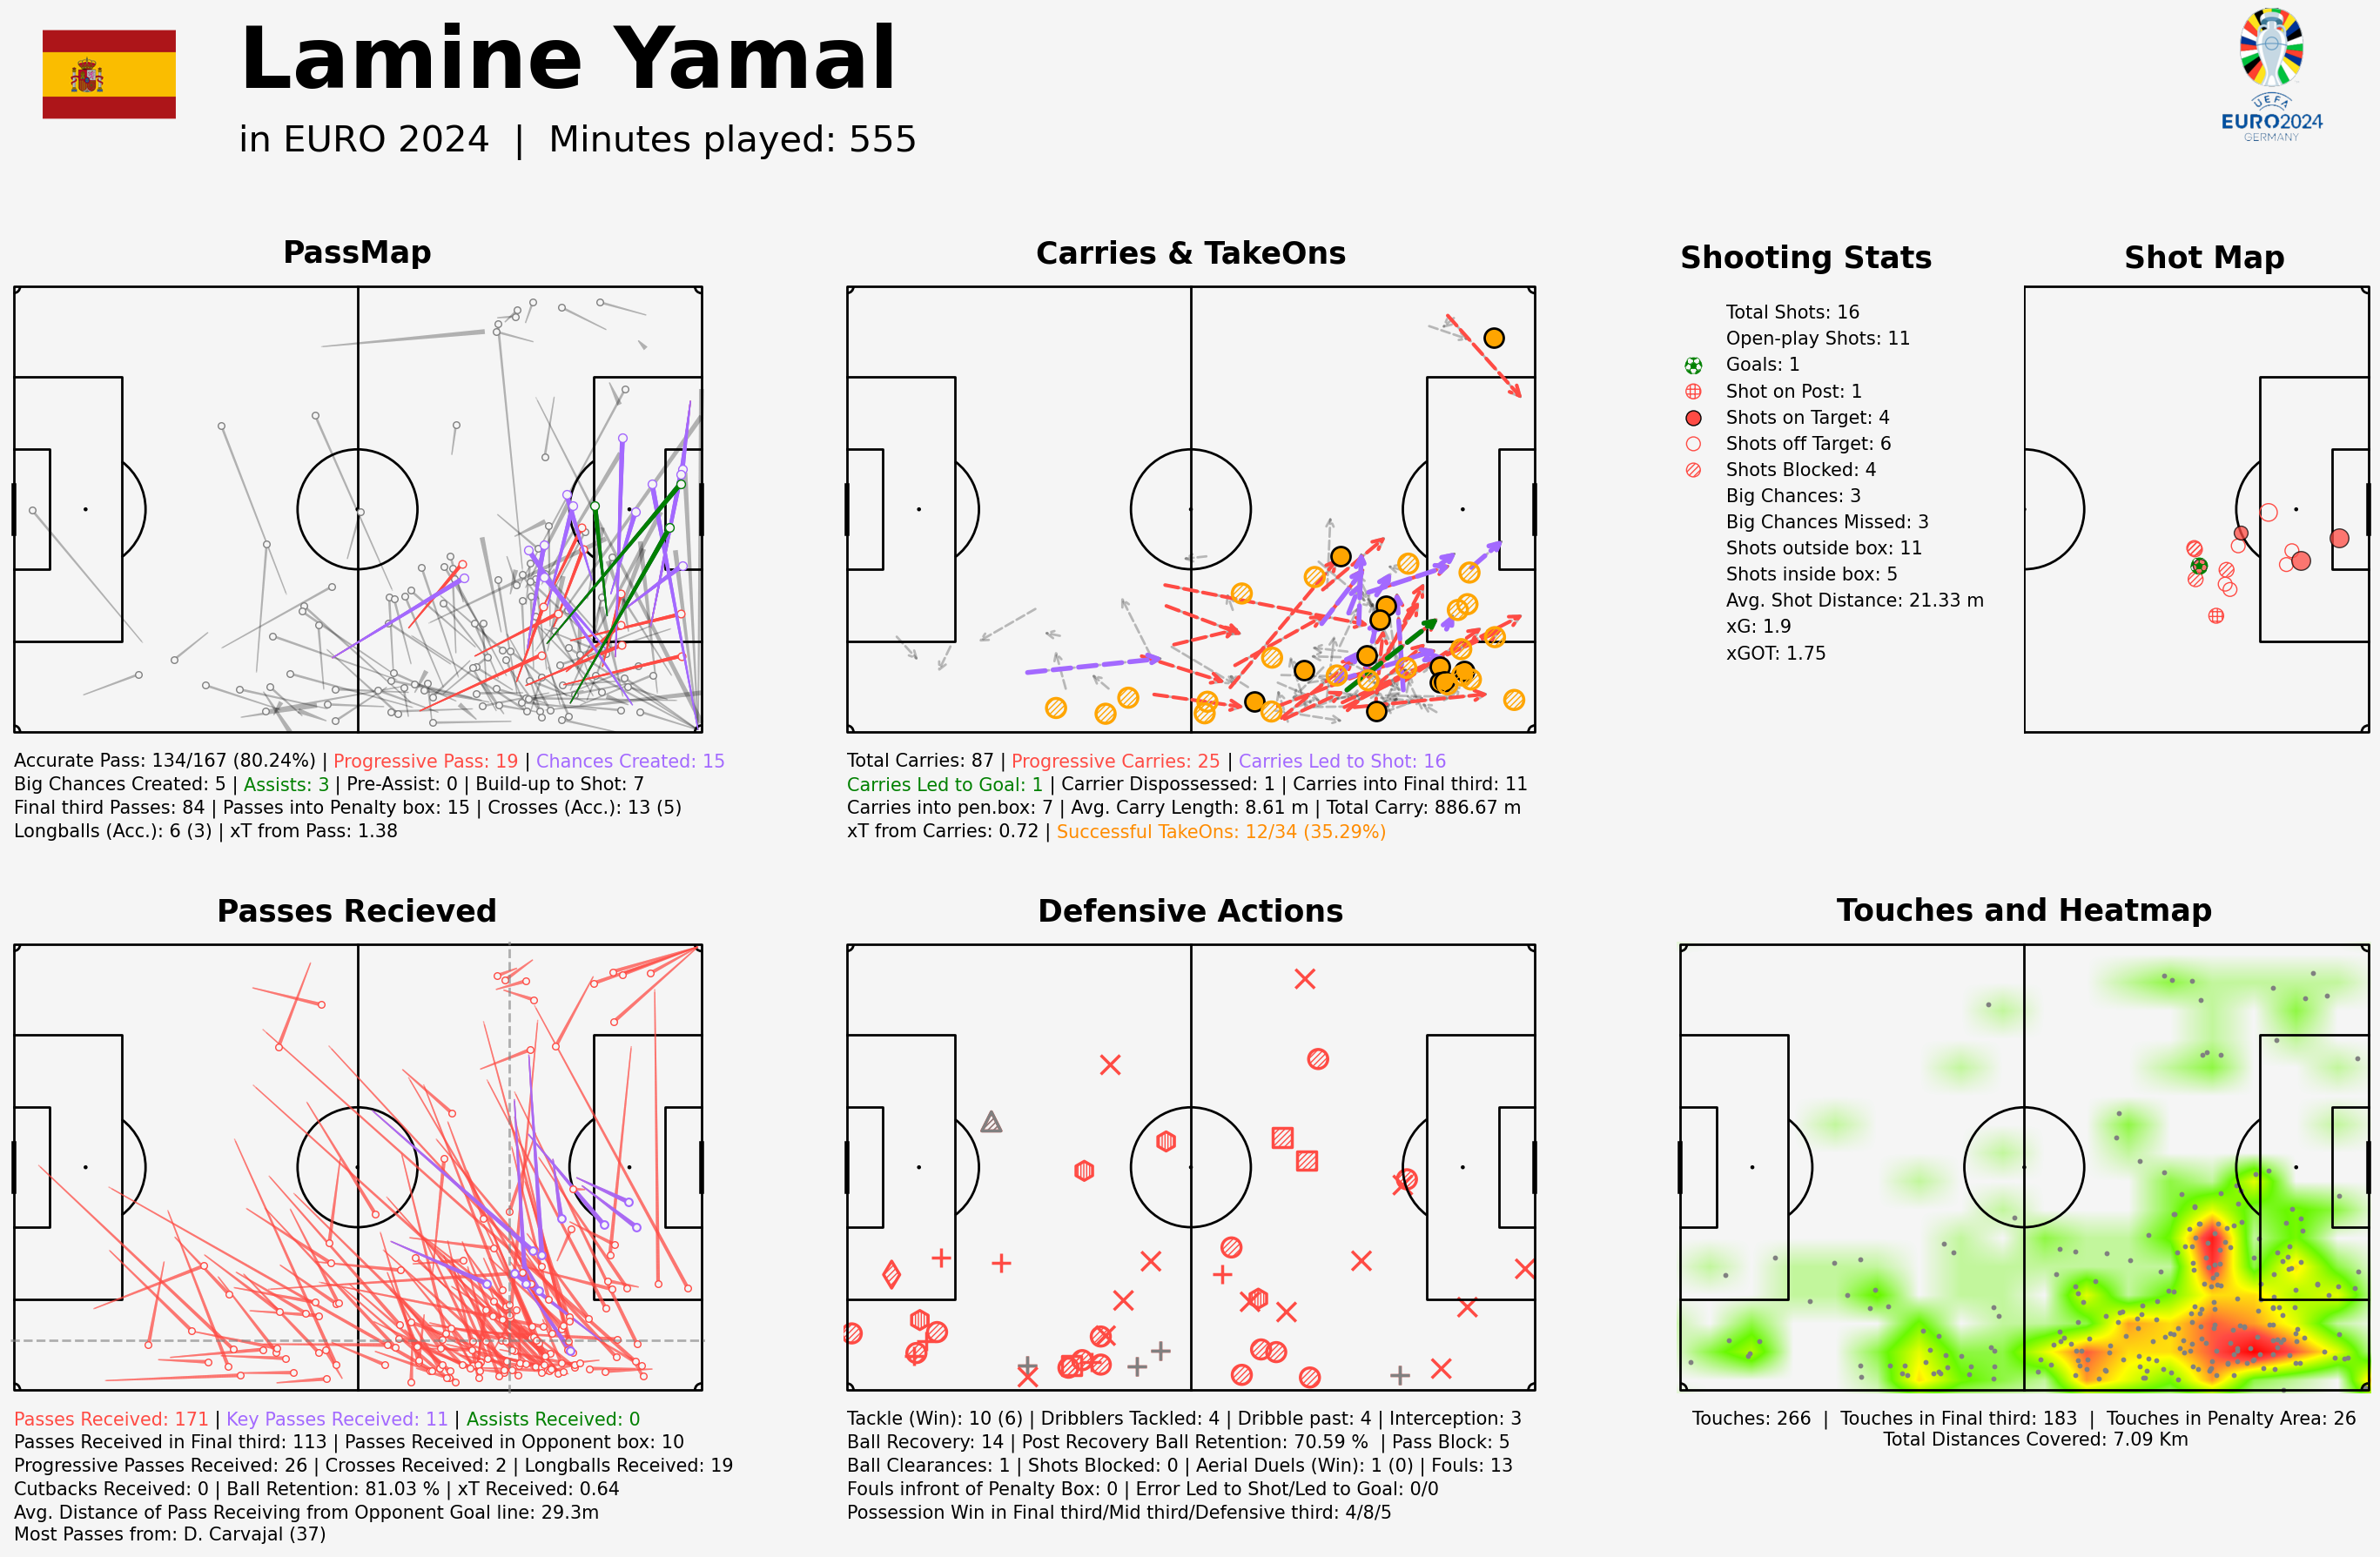

In [41]:
fig,axs=plt.subplots(2,3, figsize=(35,18), facecolor=bg_color)

pname = "Lamine Yamal"
col = hcol
# def playing_time(pname):
#     df_player = df[df['name']==pname]
#     df_player['isFirstEleven'] = df_player['isFirstEleven'].fillna(0)
#     df_sub_off = df_player[df_player['type']=='SubstitutionOff']
#     df_sub_on  = df_player[df_player['type']=='SubstitutionOn']
#     max_min = df['minute'].max()
#     if df_player['isFirstEleven'].unique() == 1 and len(df_sub_off)==0:
#         mins_played = max_min
#     elif df_player['isFirstEleven'].unique() == 1 and len(df_sub_off)==1:
#         mins_played = int(df_sub_off['minute'].unique())
#     elif df_player['isFirstEleven'].unique()==0:
#         mins_played = int(max_min - df_sub_on['minute'].unique())
#     else:
#         mins_played = 0

#     return int(mins_played)
    
# mins_played = playing_time(pname)
mins_played = 555

individual_passMap(axs[0,0], pname)
individual_carry(axs[0,1], pname)
Individual_ShotMap(axs[0,2], pname)

individual_passes_recieved(axs[1,0], pname)
individual_def_acts(axs[1,1], pname)
heatMap(axs[1,2], pname)

fig.text(0.2, 0.99, f'{pname}', fontsize=70, fontweight='bold', ha='left', va='center')
fig.text(0.2, 0.94, f'in EURO 2024  |  Minutes played: {mins_played}', 
         fontsize=30, ha='left', va='center')

himage = urlopen(f"file:///D:/FData/club_teams_logo/all_league%20-%20Copy/Spain.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.115, bottom=0.94, width=0.085, height=0.085)

timage = urlopen("file:///D:/FData/Leagues_logos/EURO2024.html")
timage = Image.open(timage)
ax_timage = add_image(timage, fig, left=0.825, bottom=0.94, width=0.085, height=0.085)